In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC())])

In [5]:
from sklearn.model_selection import GridSearchCV

params = {
'svc__C': [0.1,1,10],
'svc__gamma': [1, 0.1, 0.01]
}

gsc = GridSearchCV(pipe, params, cv=5)

In [6]:
gsc.fit(X_train, y_train)

,estimator,"Pipeline(step...svc', SVC())])"
,param_grid,"{'svc__C': [0.1, 1, ...], 'svc__gamma': [1, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [7]:
gsc.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

In [9]:
from sklearn.metrics import classification_report

y_pred=gsc.predict(X_test)

result=classification_report(y_pred, y_test) 

In [11]:
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      0.97      0.99        34
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        46
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        33
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [17]:
import numpy as np
error_indices = np.where(y_test!=y_pred)[0]

In [25]:
first_mistake = error_indices[0]

In [28]:
mistake = X_test[first_mistake].reshape(8,8)

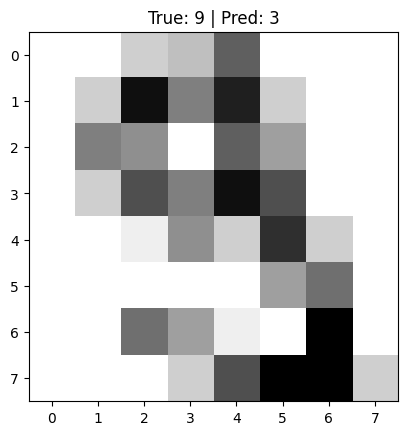

In [33]:
import matplotlib.pyplot as plt
plt.imshow(mistake, cmap=plt.cm.gray_r)
plt.title(f"True: {y_test[first_mistake]} | Pred: {y_pred[first_mistake]}")
plt.show()